In [1]:
import pandas as pd
anames=['name','sex','birth']
names1880=pd.read_table(r'C:\Users\24784\Desktop\Github\pydata-book\ch02\names\yob1880.txt',sep=',',names=anames)
names1880.head(10)

,name,sex,birth
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
5,Margaret,F,1578
6,Ida,F,1472
7,Alice,F,1414
8,Bertha,F,1320
9,Sarah,F,1288


In [2]:
names1880.groupby('sex')['birth'].sum()

sex
F     90993
M    110493
Name: birth, dtype: int64

In [3]:
years=range(1880,2011)
pieces=[]
anames=['name','sex','births']
for year in years:
    path=r'C:\Users\24784\Desktop\Github\pydata-book\ch02\names\yob%d.txt'%year
    namesframe=pd.read_table(path,sep=',',names=anames)
    namesframe['year']=year
    pieces.append(namesframe)
names=pd.concat(pieces,ignore_index=True)
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
5,Margaret,F,1578,1880
6,Ida,F,1472,1880
7,Alice,F,1414,1880
8,Bertha,F,1320,1880
9,Sarah,F,1288,1880


In [4]:
names.pivot_table('births',index='year',columns='sex',aggfunc=sum).tail()

sex,F,M
year,,
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310
2009,1827643,1973359
2010,1759010,1898382


In [45]:
def add_prop(group):
    births=group.births.astype(float)
    group['prop']=births/births.sum()
    return group
names=names.groupby(['year','sex']).apply(add_prop)
names.head(3)

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013


In [46]:
import numpy as np
np.allclose(names.groupby(['year','sex']).prop.sum(),1)

True

In [47]:
def get_top1000(group):
    return group.sort_values(by='births',ascending=False)[:1000]
grouped=names.groupby(['year','sex'])
top1000=grouped.apply(get_top1000)
top1000

name sex  births  year      prop
year sex                                               
1880 F   0             Mary   F    7065  1880  0.077643
         1             Anna   F    2604  1880  0.028618
         2             Emma   F    2003  1880  0.022013
         3        Elizabeth   F    1939  1880  0.021309
         4           Minnie   F    1746  1880  0.019188
         5         Margaret   F    1578  1880  0.017342
         6              Ida   F    1472  1880  0.016177
         7            Alice   F    1414  1880  0.015540
         8           Bertha   F    1320  1880  0.014507
         9            Sarah   F    1288  1880  0.014155
         10           Annie   F    1258  1880  0.013825
         11           Clara   F    1226  1880  0.013474
         12            Ella   F    1156  1880  0.012704
         13        Florence   F    1063  1880  0.011682
         14            Cora   F    1045  1880  0.011484
         15          Martha   F    1040  1880  0.011429
         16           Laura   F    1012  1880  0.011122
         17          Nellie   F     995  1880  0.010935
         18           Grace   F     982  1880  0.010792
         19          Carrie   F     949  1880  0.010429
         20           Maude   F     858  1880  0.009429
         21           Mabel   F     808  1880  0.008880
         22          Bessie   F     794  1880  0.008726
         23          Jennie   F     793  1880  0.008715
         24        Gertrude   F     787  1880  0.008649
         25           Julia   F     783  1880  0.008605
         26          Hattie   F     769  1880  0.008451
         27           Edith   F     768  1880  0.008440
         28          Mattie   F     704  1880  0.007737
         29            Rose   F     700  1880  0.007693
...                     ...  ..     ...   ...       ...
2010 M   1677617       Yair   M     201  2010  0.000106
         1677616      Talan   M     201  2010  0.000106
         1677614      Keyon   M     201  2010  0.000106
         1677613       Kael   M     201  2010  0.000106
         1677618   Demarion   M     200  2010  0.000105
         1677619     Gibson   M     200  2010  0.000105
         1677620     Reagan   M     200  2010  0.000105
         1677621  Cristofer   M     199  2010  0.000105
         1677622     Daylen   M     199  2010  0.000105
         1677623     Jordon   M     199  2010  0.000105
         1677624    Dashawn   M     198  2010  0.000104
         1677625      Masen   M     198  2010  0.000104
         1677629      Rowen   M     197  2010  0.000104
         1677631     Yousef   M     197  2010  0.000104
         1677630   Thaddeus   M     197  2010  0.000104
         1677628      Kadin   M     197  2010  0.000104
         1677627     Dillan   M     197  2010  0.000104
         1677626   Clarence   M     197  2010  0.000104
         1677634      Slade   M     196  2010  0.000103
         1677632    Clinton   M     196  2010  0.000103
         1677633    Sheldon   M     196  2010  0.000103
         1677636    Keshawn   M     195  2010  0.000103
         1677637   Menachem   M     195  2010  0.000103
         1677635     Joziah   M     195  2010  0.000103
         1677638     Bailey   M     194  2010  0.000102
         1677639     Camilo   M     194  2010  0.000102
         1677640     Destin   M     194  2010  0.000102
         1677641     Jaquan   M     194  2010  0.000102
         1677642     Jaydan   M     194  2010  0.000102
         1677645     Maxton   M     193  2010  0.000102

[261877 rows x 5 columns]

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\reshape\pivot.py:135: FutureWarning: 'year' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  grouped = data.groupby(keys)


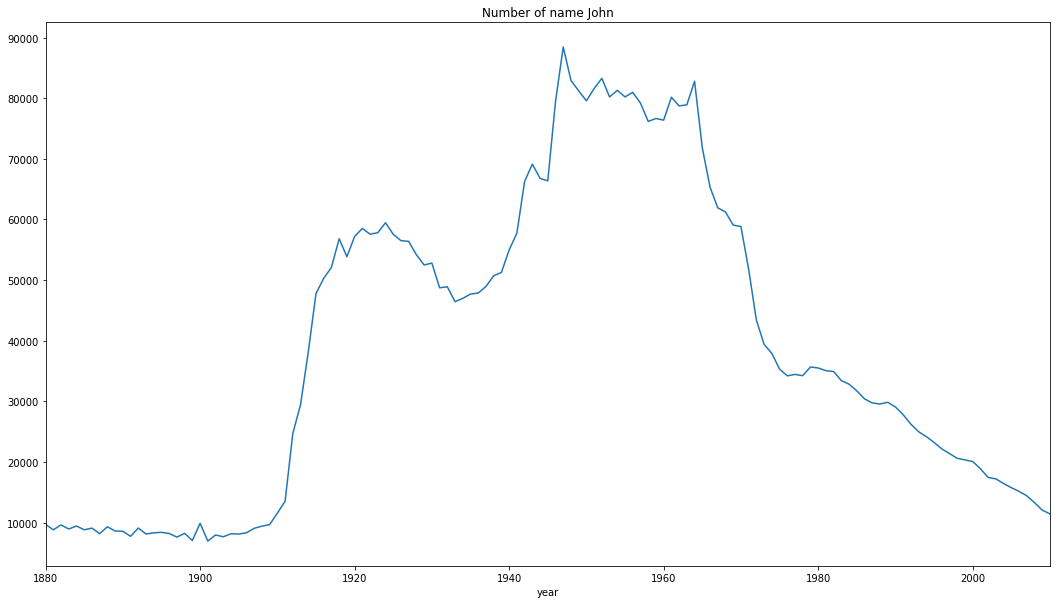

In [48]:
total_births=top1000.pivot_table('births',index='year',columns='name',aggfunc=sum)
subset=total_births['John']
import matplotlib.pyplot as plt
subset.plot(figsize=(18,10),title='Number of name John')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\reshape\pivot.py:135: FutureWarning: 'year' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  grouped = data.groupby(keys)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\reshape\pivot.py:135: FutureWarning: 'sex' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  grouped = data.groupby(keys)


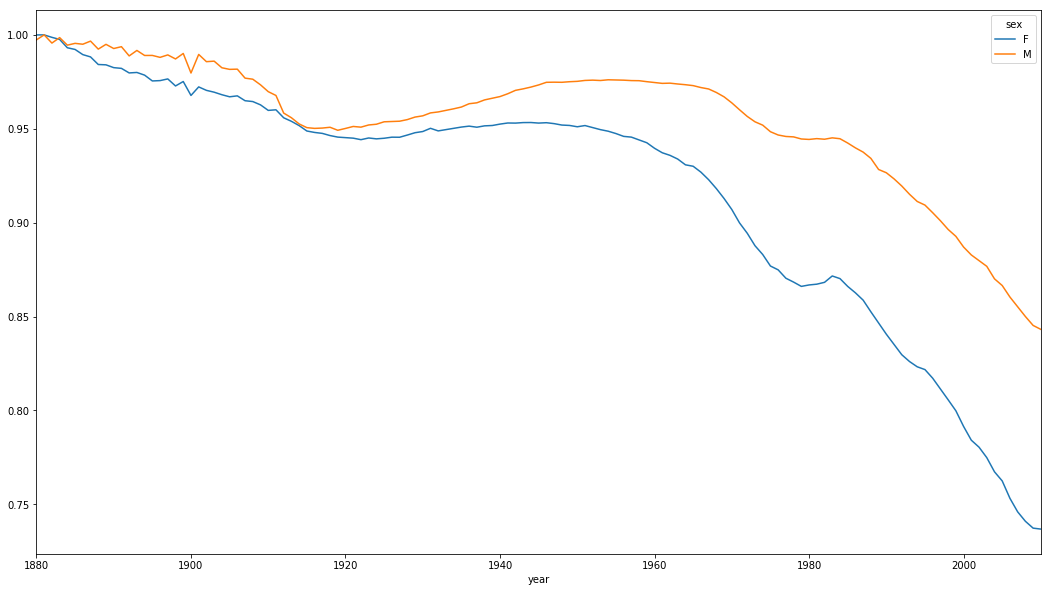

In [50]:
table=top1000.pivot_table('prop',index='year',columns='sex',aggfunc=sum)
table.plot(figsize=(18,10))
plt.show()

In [57]:
boys=top1000[top1000.sex=='M']
df=boys[boys.year==2010]
prop_cumsum=df.sort_values(by='prop',ascending=False).prop.cumsum()
prop_cumsum.searchsorted(0.5)

array([116], dtype=int64)

In [60]:
get_last_letter=lambda x:x[-1]
last_letters=names.name.apply(get_last_letter)
last_letters.name='last_letter'

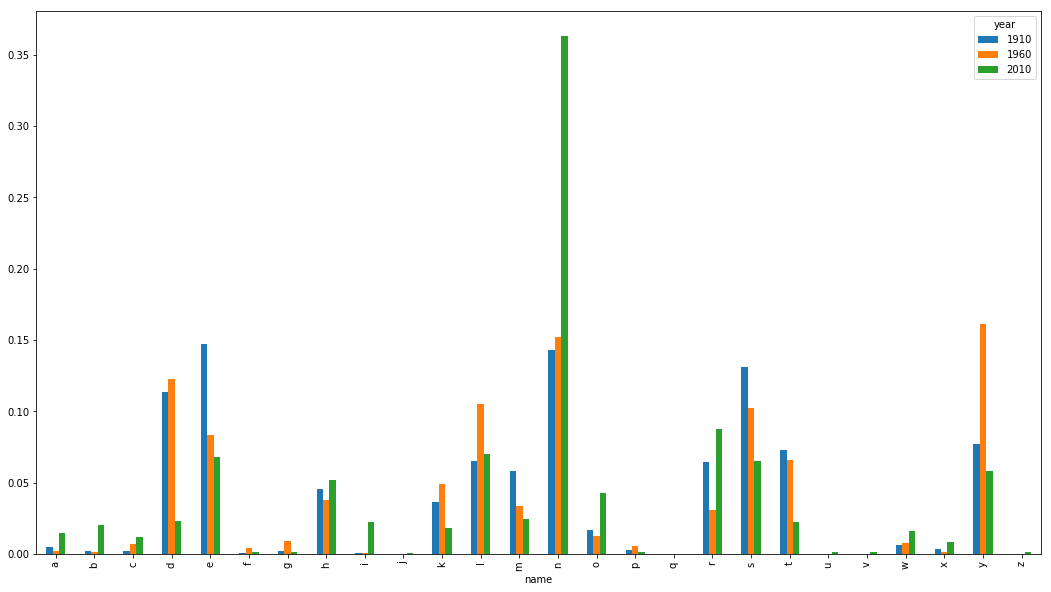

In [79]:
table=names.pivot_table('births',index=last_letter,columns=['sex','year'],aggfunc=sum)
subtable=table.reindex(columns=[1910,1960,2010],level='year')
subtable.sum()
letter_prop=subtable/subtable.sum()
letter_prop['M'].plot(kind='bar',figsize=(18,10))
plt.show()